In [1]:
%matplotlib notebook
import IPython
from IPython.display import display
import pandas as pd
import csv
from numpy import nan as NA
from datetime import datetime
import re
import sys
import numpy as np
import matplotlib.pyplot as plt 
from pandas import *
import pickle
import requests
import os


In [2]:
#Panda settings
#Pandas will not display all columns in our data when using the head() function without this
pd.set_option('max_columns',50) 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# ---------------------FEATURE EXPLORATION AND IMPORTANCE------------------

Opening Pickled DataFrame...

In [3]:
with open('merged_dataset.pickle', 'rb') as data:
    
    df = pickle.load(data)

In [4]:
df.head()

,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,offensegroup,LONGITUDE,offense-text,SHIFT,YBLOCK,DISTRICT,WARD,YEAR,offensekey,BID,sector,PSA,ucr-rank,BLOCK_GROUP,VOTING_PRECINCT,XBLOCK,BLOCK,START_DATE,CCN,OFFENSE,ANC,datetime,METHOD,location,LATITUDE,splitted,startblock,endblock_1,endblock,street,year,month,day,hour,minute,second,Year,Month,Day,Hour,Temperature,Precipitation,Snowfall
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-06-11 04:00:00,cluster 31,7804.0,violent,-76.932,robbery,midnight,136546.000000,6.0,7.0,2010,violent|robbery,NaN,6D1,602.0,4,007804 2,precinct 97,405898.000000,540 - 599 block of 49th place ne,2010-06-11 22:30:00,10080799,robbery,7C,2010-06-11 04:00:00,others,"38.896751286872707,-76.93201207834224",38.897,"[540, 599 49th place ne]",540,"[599, 49th place ne]",599,49th place ne,2010.0,6.0,11.0,22.0,30.0,0.0,2010,6,11,4,61.84,0.0,0.0
2010-06-11 05:00:00,cluster 18,2400.0,violent,-77.020,robbery,midnight,141570.920001,4.0,4.0,2010,violent|robbery,NaN,4D2,404.0,4,002400 4,precinct 46,398260.279996,upshur street nw and new hampshire avenue nw,2010-06-10 23:55:00,10080832,robbery,4C,2010-06-11 05:00:00,others,"38.942035475431588,-77.020069943309622",38.942,"[upshur, St nw and new hampshire avenue nw]",upshur,"[St, nw and new hampshire avenue nw]",St,nw and new hampshire avenue nw,2010.0,6.0,10.0,23.0,55.0,0.0,2010,6,11,5,61.61,0.0,0.0
2010-06-11 05:00:00,cluster 32,7703.0,property,-76.949,theft f/auto,midnight,135316.000000,6.0,7.0,2010,property|theft f/auto,NaN,6D3,603.0,7,007703 3,precinct 107,404434.000000,153 - 399 block of ridge road se,2010-06-11 00:30:00,10080847,theft f/auto,7F,2010-06-11 05:00:00,others,"38.885679590878482,-76.948896522063663",38.886,"[153, 399 ridge road se]",153,"[399, ridge road se]",399,ridge road se,2010.0,6.0,11.0,0.0,30.0,0.0,2010,6,11,5,61.61,0.0,0.0
2010-06-11 06:00:00,cluster 33,9903.0,property,-76.919,theft/other,midnight,135703.000000,6.0,7.0,2010,property|theft/other,NaN,6D3,604.0,6,009903 1,precinct 105,407051.000000,1 - 99 block of 57th street se,2010-06-11 00:57:00,10080850,theft/other,7E,2010-06-11 06:00:00,others,"38.889148741178559,-76.91872933103275",38.889,"[1, 99 57th St se]",1,"[99, 57th St se]",99,57th St se,2010.0,6.0,11.0,0.0,57.0,0.0,2010,6,11,6,63.82,0.8,0.0
2010-06-11 06:00:00,cluster 7,4802.0,property,-77.022,theft f/auto,midnight,137620.600000,3.0,6.0,2010,property|theft f/auto,NaN,3D2,308.0,7,004802 2,precinct 18,398099.100000,1200 - 1299 block of 7th street nw,2010-06-11 10:00:00,10081080,theft f/auto,6E,2010-06-11 06:00:00,others,"38.906449394861696,-77.021918211767641",38.906,"[1200, 1299 7th St nw]",1200,"[1299, 7th St nw]",1299,7th St nw,2010.0,6.0,11.0,10.0,0.0,0.0,2010,6,11,6,63.82,0.8,0.0


### 1. Elimination of extra possible target variables, we will leave only three offense variables and select the one that best suits our model

In [5]:
df = df.drop(columns = ['METHOD', 'CCN', 'offensekey',
                       'offense-text', 'BID'])

### 2. Elimination of NaN values. We discovered that dropping NaN yiels better results than imputing missing values

In [6]:
df = df.dropna()

### 3. Defining the features(X)

In [7]:
X = df.drop(columns = ['offensegroup', 'ucr-rank', 'OFFENSE'])
X_raw = df.drop(columns = ['offensegroup', 'ucr-rank', 'OFFENSE']) # X_raw is the unencoded Dataframe that will be used later in the demo.

### 4. Defining the target variable:

Here we will test 3 different target variables: offensegroup, has two classes (violent and property), "OFFENSE" which has 9 different types of crime; and "ucr-rank" which combine the previous two into a score.

For the purpuse of this study:

y = "offensegroup"

w = "OFFENSE"

z = "ucr-rank"

In [8]:
y = df['offensegroup']
w =  df['OFFENSE']
z = df['ucr-rank']

In [9]:
print( df['offensegroup'].value_counts())
print (df['OFFENSE'].value_counts())
print (df['ucr-rank'].value_counts())

property    230618
violent      47177
Name: offensegroup, dtype: int64
theft/other                   102462
theft f/auto                   82325
robbery                        26379
burglary                       23033
motor vehicle theft            22602
assault w/dangerous weapon     17686
sex abuse                       2170
homicide                         942
arson                            196
Name: OFFENSE, dtype: int64
6    102462
7     82325
4     26379
5     23033
8     22602
3     17686
2      2170
1       942
9       196
Name: ucr-rank, dtype: int64


Rounding Temperature Values:

In [10]:
X['Temperature'] = X['Temperature'].round(decimals = 0)
X_raw['Temperature'] = X_raw['Temperature'].round(decimals = 0)

In [11]:
print(X['Temperature'].nunique())
print(X['Temperature'].min())
print(X['Temperature'].max())

90
9.0
98.0


In [12]:
print(X_raw['Temperature'].nunique())
print(X_raw['Temperature'].min())
print(X_raw['Temperature'].max())

90
9.0
98.0


As we can see here: OFFENSE and ucr-rank are exactly the same columns but with different format.
From now on. We will select y("offensegroup") and z("ucr-rank") as our study variables.
We expected "OFFENSE" and "urc-rank" to be different since robbery is a violent crime and also a property crime but here in this dataset robbery is considered only to be violent and not both.

### 5. Encoding our data using Labelencoder to transform everything into numeric. We will not use OneHotEncoder so we do not loose interpretability.

In [13]:
X_raw.head()

,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,LONGITUDE,SHIFT,YBLOCK,DISTRICT,WARD,YEAR,sector,PSA,BLOCK_GROUP,VOTING_PRECINCT,XBLOCK,BLOCK,START_DATE,ANC,datetime,location,LATITUDE,splitted,startblock,endblock_1,endblock,street,year,month,day,hour,minute,second,Year,Month,Day,Hour,Temperature,Precipitation,Snowfall
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-06-11 04:00:00,cluster 31,7804.0,-76.932,midnight,136546.000000,6.0,7.0,2010,6D1,602.0,007804 2,precinct 97,405898.000000,540 - 599 block of 49th place ne,2010-06-11 22:30:00,7C,2010-06-11 04:00:00,"38.896751286872707,-76.93201207834224",38.897,"[540, 599 49th place ne]",540,"[599, 49th place ne]",599,49th place ne,2010.0,6.0,11.0,22.0,30.0,0.0,2010,6,11,4,62.0,0.0,0.0
2010-06-11 05:00:00,cluster 18,2400.0,-77.020,midnight,141570.920001,4.0,4.0,2010,4D2,404.0,002400 4,precinct 46,398260.279996,upshur street nw and new hampshire avenue nw,2010-06-10 23:55:00,4C,2010-06-11 05:00:00,"38.942035475431588,-77.020069943309622",38.942,"[upshur, St nw and new hampshire avenue nw]",upshur,"[St, nw and new hampshire avenue nw]",St,nw and new hampshire avenue nw,2010.0,6.0,10.0,23.0,55.0,0.0,2010,6,11,5,62.0,0.0,0.0
2010-06-11 05:00:00,cluster 32,7703.0,-76.949,midnight,135316.000000,6.0,7.0,2010,6D3,603.0,007703 3,precinct 107,404434.000000,153 - 399 block of ridge road se,2010-06-11 00:30:00,7F,2010-06-11 05:00:00,"38.885679590878482,-76.948896522063663",38.886,"[153, 399 ridge road se]",153,"[399, ridge road se]",399,ridge road se,2010.0,6.0,11.0,0.0,30.0,0.0,2010,6,11,5,62.0,0.0,0.0
2010-06-11 06:00:00,cluster 33,9903.0,-76.919,midnight,135703.000000,6.0,7.0,2010,6D3,604.0,009903 1,precinct 105,407051.000000,1 - 99 block of 57th street se,2010-06-11 00:57:00,7E,2010-06-11 06:00:00,"38.889148741178559,-76.91872933103275",38.889,"[1, 99 57th St se]",1,"[99, 57th St se]",99,57th St se,2010.0,6.0,11.0,0.0,57.0,0.0,2010,6,11,6,64.0,0.8,0.0
2010-06-11 06:00:00,cluster 7,4802.0,-77.022,midnight,137620.600000,3.0,6.0,2010,3D2,308.0,004802 2,precinct 18,398099.100000,1200 - 1299 block of 7th street nw,2010-06-11 10:00:00,6E,2010-06-11 06:00:00,"38.906449394861696,-77.021918211767641",38.906,"[1200, 1299 7th St nw]",1200,"[1299, 7th St nw]",1299,7th St nw,2010.0,6.0,11.0,10.0,0.0,0.0,2010,6,11,6,64.0,0.8,0.0


In [23]:
from sklearn.preprocessing import LabelEncoder
def encoder(data):
    """This function will encode multiple features using LabelEncoder"""
    encoder = LabelEncoder() # it only support one dimentional columns.. 
    
    for colname,col in data.iteritems(): # adapted from stack overflow  
        data[colname] = encoder.fit_transform(col.astype(str)) # note here that all was transformef to a string so from now, all x features are encoded in a way that cannot be interpreted.
    return (data)

In [15]:
X = encoder(X)
encoder = LabelEncoder()
y = encoder.fit_transform(y)


#z = LabelEncoder().fit_transform(z)

In [16]:
with open('x_y_z.pickle', 'wb') as xyz:
    pickle.dump([X,y,z, X_raw] , xyz)

In [17]:
X.head()

,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,LONGITUDE,SHIFT,YBLOCK,DISTRICT,WARD,YEAR,sector,PSA,BLOCK_GROUP,VOTING_PRECINCT,XBLOCK,BLOCK,START_DATE,ANC,datetime,location,LATITUDE,splitted,startblock,endblock_1,endblock,street,year,month,day,hour,minute,second,Year,Month,Day,Hour,Temperature,Precipitation,Snowfall
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-06-11 04:00:00,24,118,22,2,4590,5,6,0,15,41,299,140,13368,10126,344,31,0,5670,77,10130,1361,8750,1556,57,20,8,2,15,24,0,0,8,2,18,52,0,0
2010-06-11 05:00:00,9,37,110,2,11298,3,3,0,10,27,119,84,5742,14770,288,18,1,14584,122,14770,2167,11145,1824,2102,20,8,1,16,51,0,0,8,2,19,52,0,0
2010-06-11 05:00:00,25,113,39,2,3168,5,6,0,17,42,286,9,12573,2427,293,34,1,3745,66,2431,227,6230,1039,2429,20,8,2,0,24,0,0,8,2,19,52,0,0
2010-06-11 06:00:00,26,173,9,2,3533,5,6,0,17,43,411,7,13890,139,294,33,2,4220,69,142,1,10303,1821,457,20,8,2,0,53,0,0,8,2,20,54,8,0
2010-06-11 06:00:00,36,70,112,2,6387,2,5,0,7,23,194,53,5515,1121,310,29,2,8108,86,1125,71,644,112,477,20,8,2,2,0,0,0,8,2,20,54,8,0


### 6. Feature Variability Analisis:

<IPython.core.display.Javascript object>


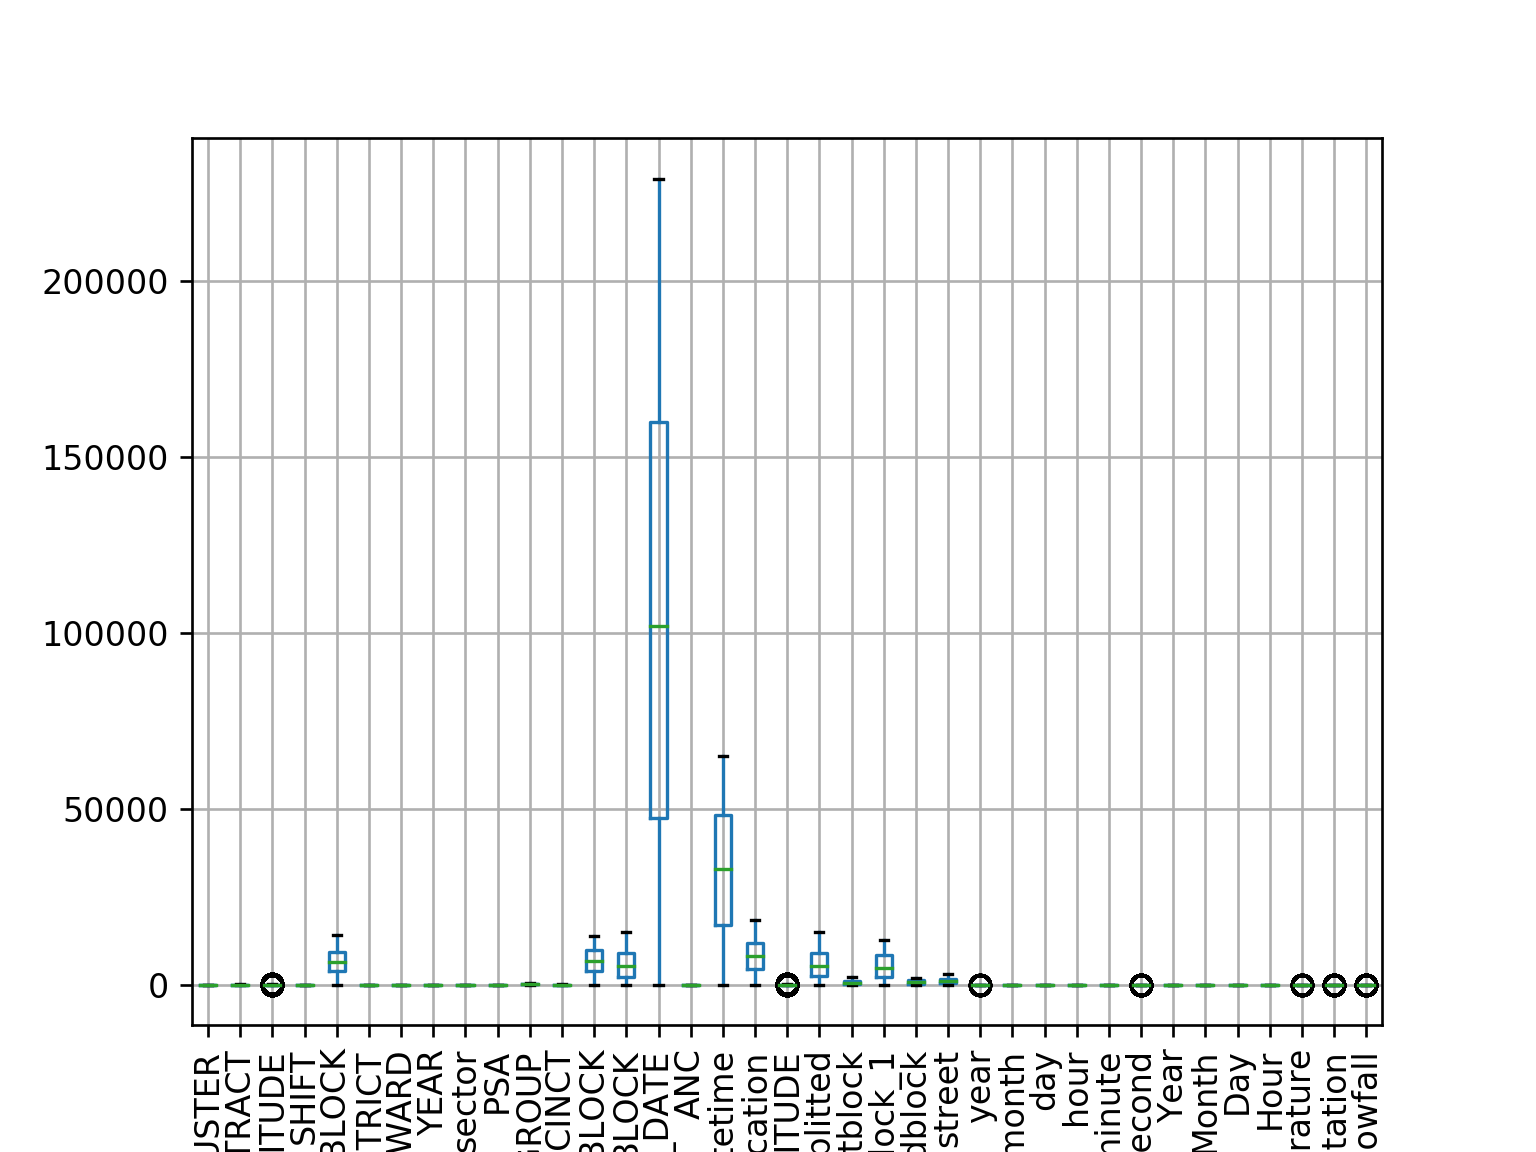

In [19]:
cols2 = pd.DataFrame(X)
cols2 = list(cols2.columns)

boxplot = X.boxplot(column=cols2, rot=90, fontsize=10)

As we can see here there is great variability in our features. In order to get better result we will need to scale our data...

After Scaling:

<IPython.core.display.Javascript object>


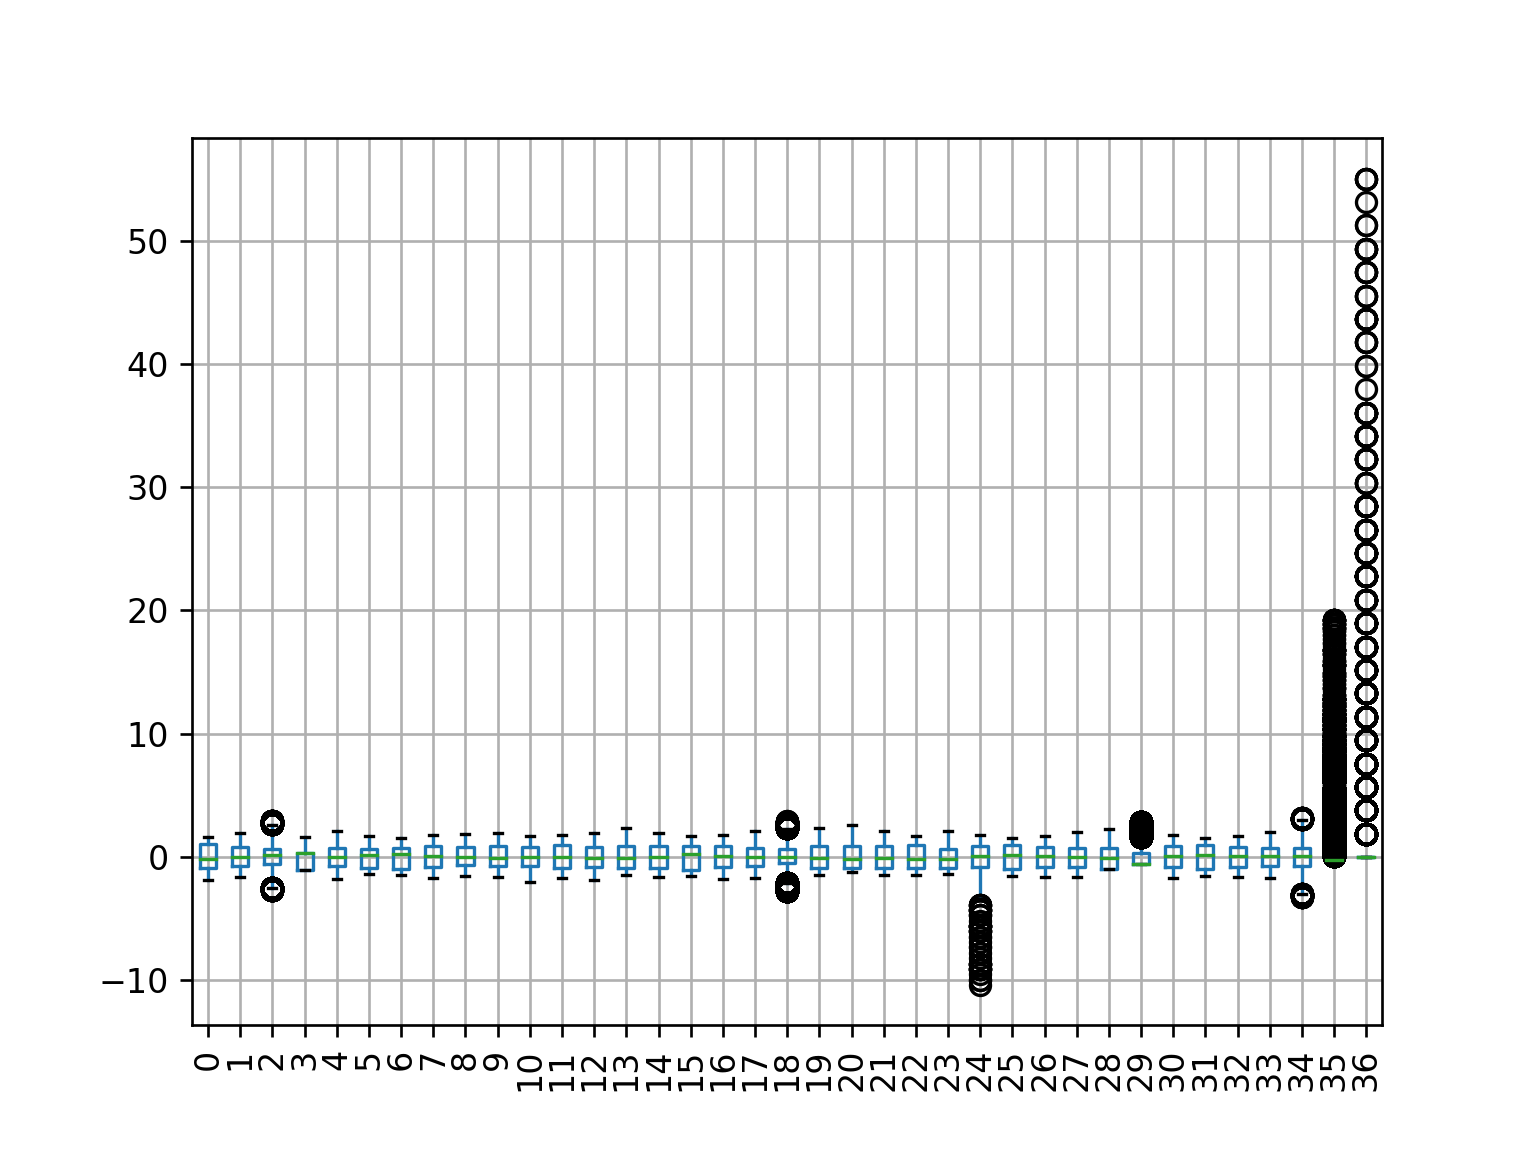

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
scaler = StandardScaler()
#scaler =  MinMaxScaler()
#scaler = Normalizer()
X_1 = scaler.fit(X).transform(X)
X_1 = pd.DataFrame(X_1)
cols2 = pd.DataFrame(X_1)
cols2 = list(cols2.columns)

boxplot = X_1.boxplot(column=cols2, rot=90, fontsize=10)

Standard Scaling Produced the best results. 

## 7. Feature importance analysis

    The idea here is to identify the features that have a greater impact in our merged dataset.


In [21]:
print (X.columns)

Index(['NEIGHBORHOOD_CLUSTER', 'CENSUS_TRACT', 'LONGITUDE', 'SHIFT', 'YBLOCK',
       'DISTRICT', 'WARD', 'YEAR', 'sector', 'PSA', 'BLOCK_GROUP',
       'VOTING_PRECINCT', 'XBLOCK', 'BLOCK', 'START_DATE', 'ANC', 'datetime',
       'location', 'LATITUDE', 'splitted', 'startblock', 'endblock_1',
       'endblock', 'street', 'year', 'month', 'day', 'hour', 'minute',
       'second', 'Year', 'Month', 'Day', 'Hour', 'Temperature',
       'Precipitation', 'Snowfall'],
      dtype='object')


In [24]:
features = ['NEIGHBORHOOD_CLUSTER', 'CENSUS_TRACT', 'LONGITUDE', 'SHIFT', 'YBLOCK',
       'DISTRICT', 'WARD', 'YEAR', 'sector', 'PSA', 'BLOCK_GROUP',
       'VOTING_PRECINCT', 'XBLOCK', 'BLOCK', 'ANC', 'datetime', 'location',
       'LATITUDE', 'splitted', 'startblock', 'endblock_1', 'endblock',
       'street', 'year', 'month', 'day', 'hour', 'minute', 'second', 'Year',
       'Month', 'Day', 'Hour', 'Temperature', 'Precipitation', 'Snowfall']

Xi = df[features]
Xi = encoder(Xi)
yi = df['offensegroup']

c:\users\franc\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


<IPython.core.display.Javascript object>


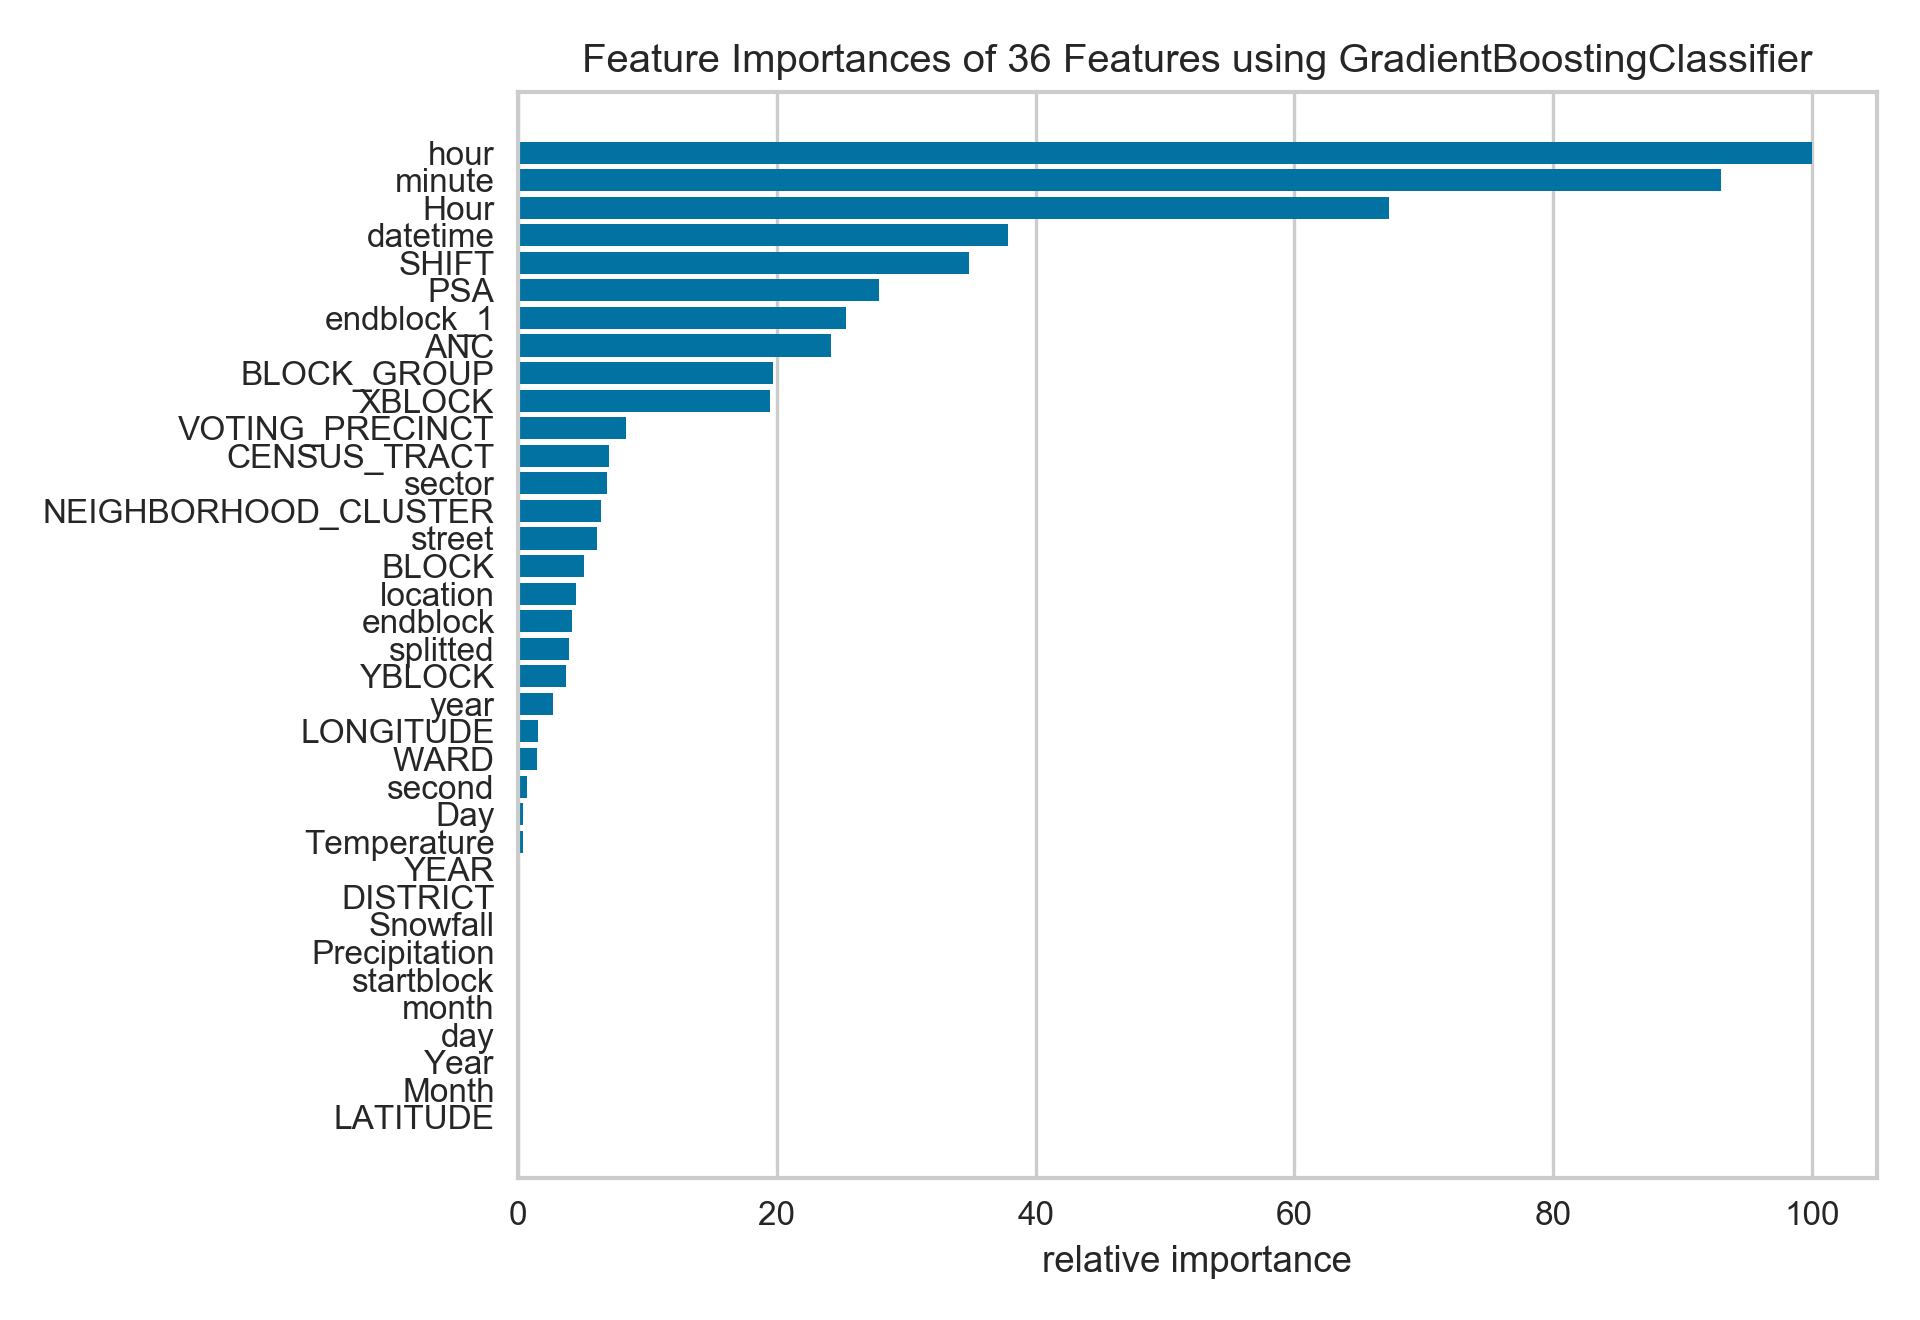

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
fig = plt.figure()
ax = fig.add_subplot()

viz = FeatureImportances(GradientBoostingClassifier(), ax=ax)
viz.fit(Xi, yi)
viz.poof()

This chart shows all the features of the dataset and ther importance. It will be important to select the most relevan but in this case we will have to perform other analysis in order to identify the correct number of features.

## 8. Recursive Feature elimination to select the most important number of features:

WARNING: before rerunning the next algorinthms, make sure that the n_jobs is set to 1. Here is set to -1 to improve performance but if the computer cpu is not fast it could cause overheating.

In [26]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

def rec_fe(target_var, filename):
    
    if __name__ == '__main__':

        rmf = RandomForestClassifier()
        rfecv = RFECV(estimator=rmf, step=1, cv=StratifiedKFold(12), scoring='accuracy', verbose = 10, n_jobs = -1)
        rfecv.fit(X,target_var)
        optimal_features = rfecv.n_features_

        print("Optimal number of features : %d" % rfecv.n_features_) 

        with open(filename, 'wb') as features:
            pickle.dump([optimal_features, rfecv] , features)
    

### for y("offensegroup"):

In [27]:
rec_fe(y,'Optimal_number_of_features_y.pickle')

Optimal number of features : 24


In [29]:
with open('Optimal_number_of_features_y.pickle', "rb") as feature:
    feat = pickle.load(feature, encoding="utf8")

rfecv = feat[1]


<IPython.core.display.Javascript object>


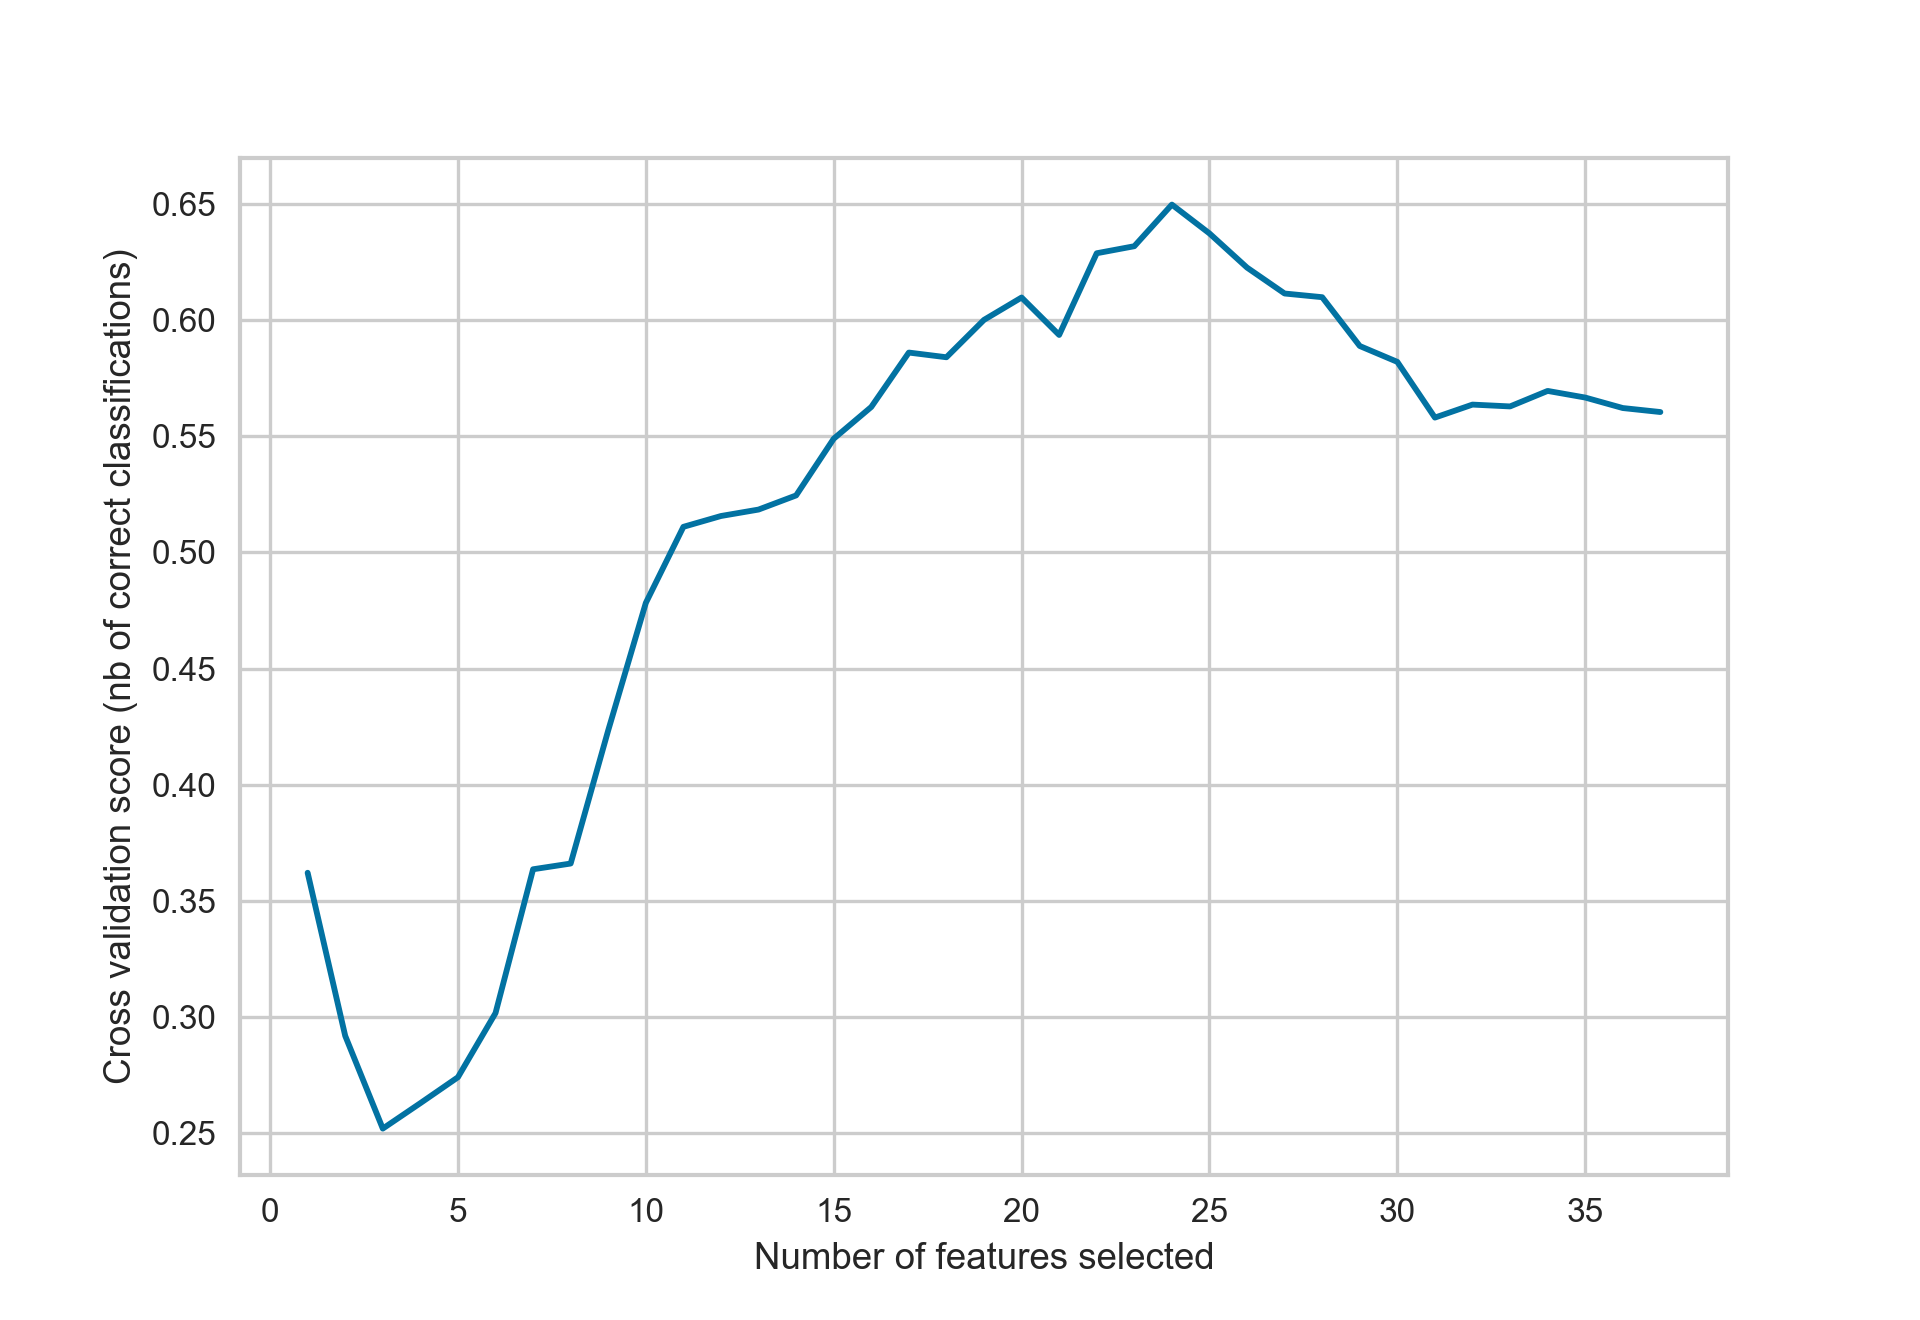

In [31]:

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### for z("ucr-rank"):

In [32]:
rec_fe(z,'Optimal_number_of_features_z.pickle')

Optimal number of features : 23


In [33]:
with open('Optimal_number_of_features_z.pickle', "rb") as feature:
    feat2 = pickle.load(feature, encoding="utf8")

rfecv = feat2[1]


<IPython.core.display.Javascript object>


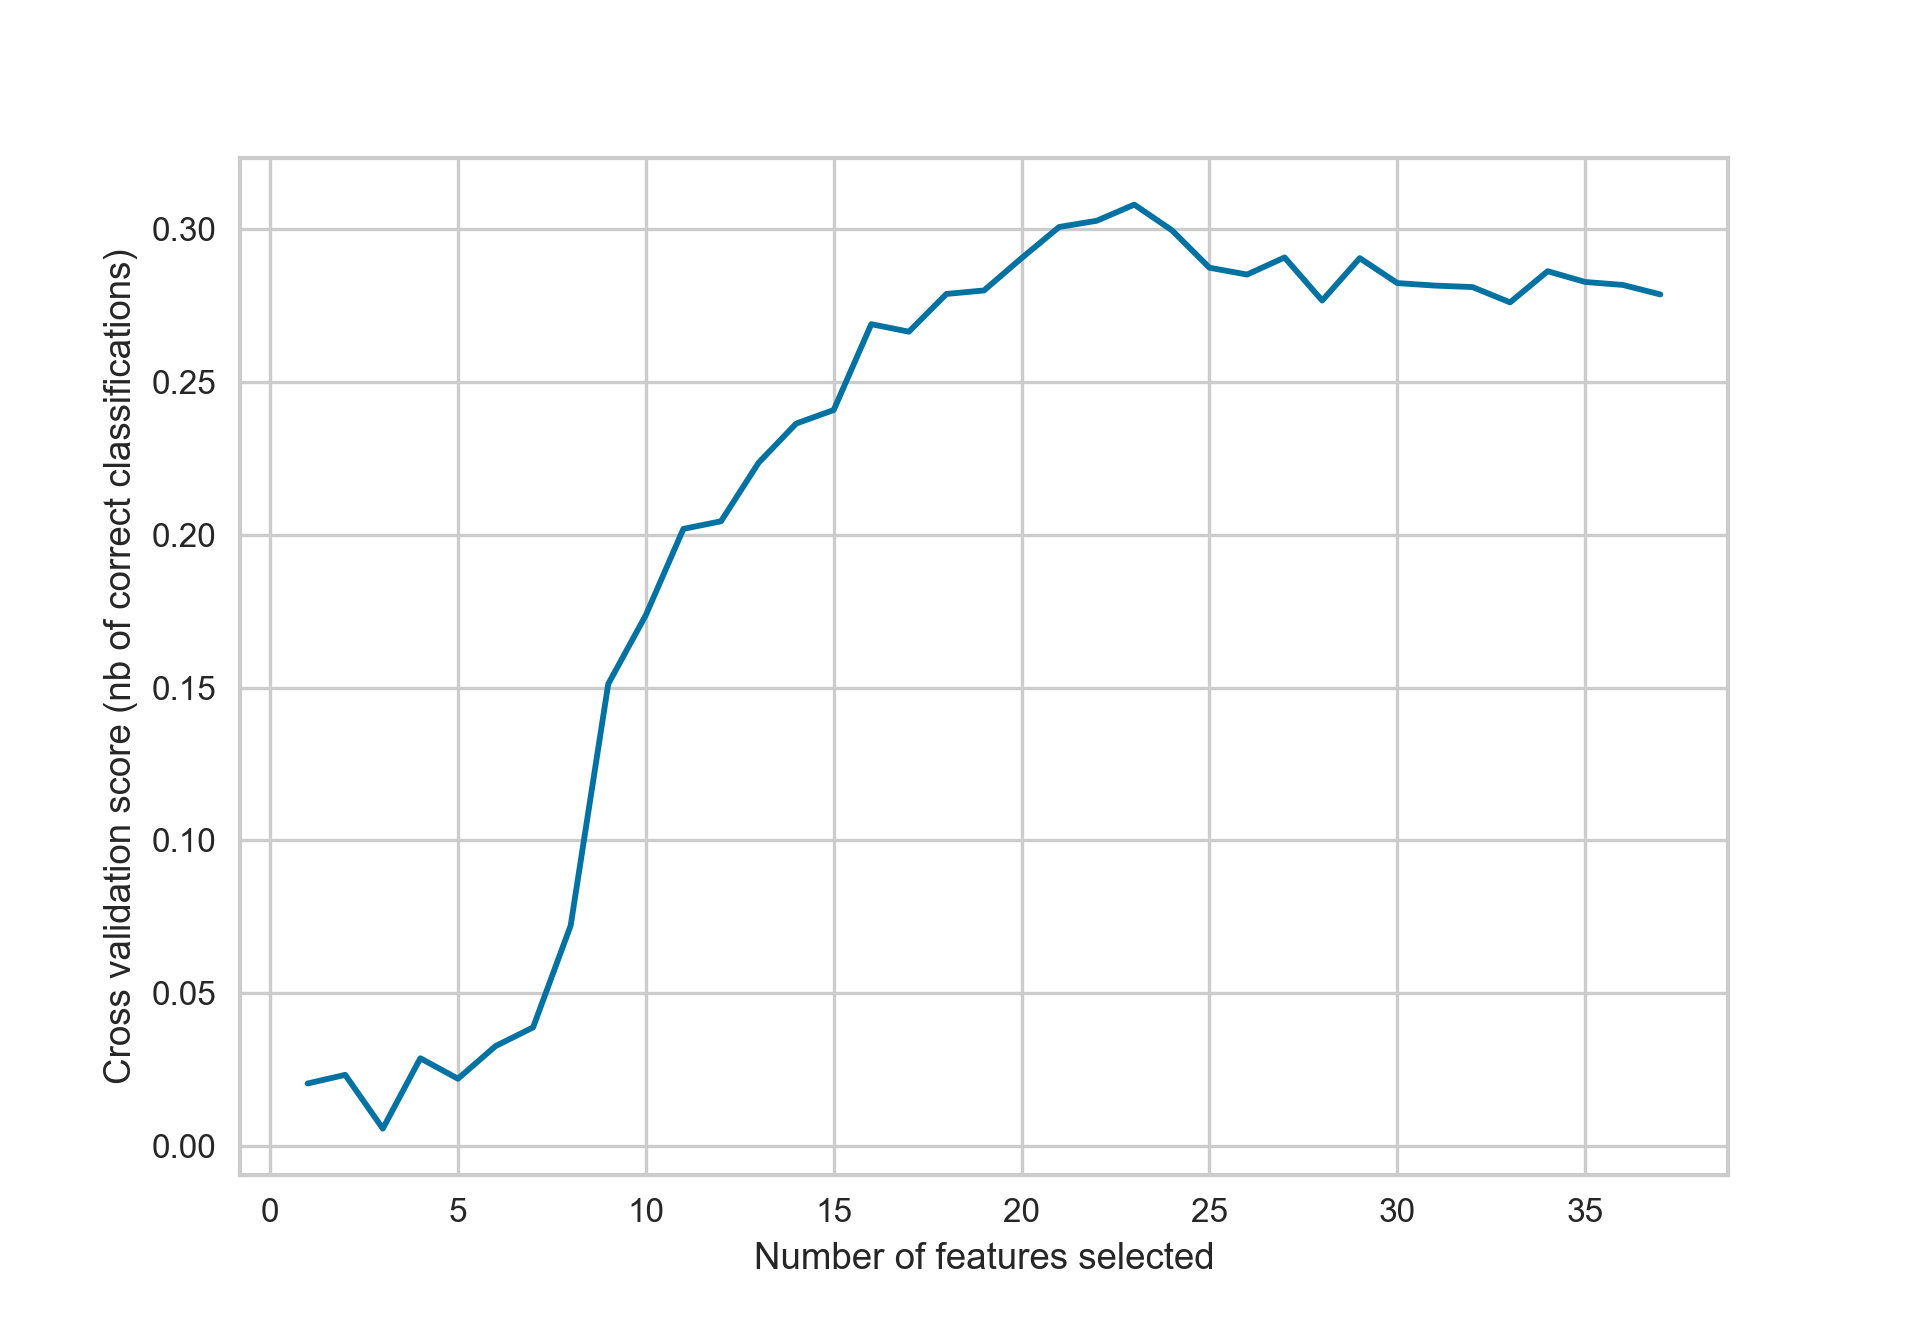

In [34]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

As we Can see here, the recursive Feature Elinination figure shows that the optimal number of features is 24 and 23 for "offensegroup and "ucr-rank" respectively. 
Unfortunately most of the features are codified locations used by the police.
At the end of this analysis we will run our final models with both target variables, with all features and also with the most 'user friendy features' wich will be part of our demostration

## 8. Target Variable grouping

In this section we will perform a clustering analysis to identify how the target variables instances are grouped together.

### 8.1 UCR rank

In [37]:
z_ = z # remember that z is "ucr-rank"
z_ = z_.reshape(-1, 1)

c:\users\franc\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


<IPython.core.display.Javascript object>


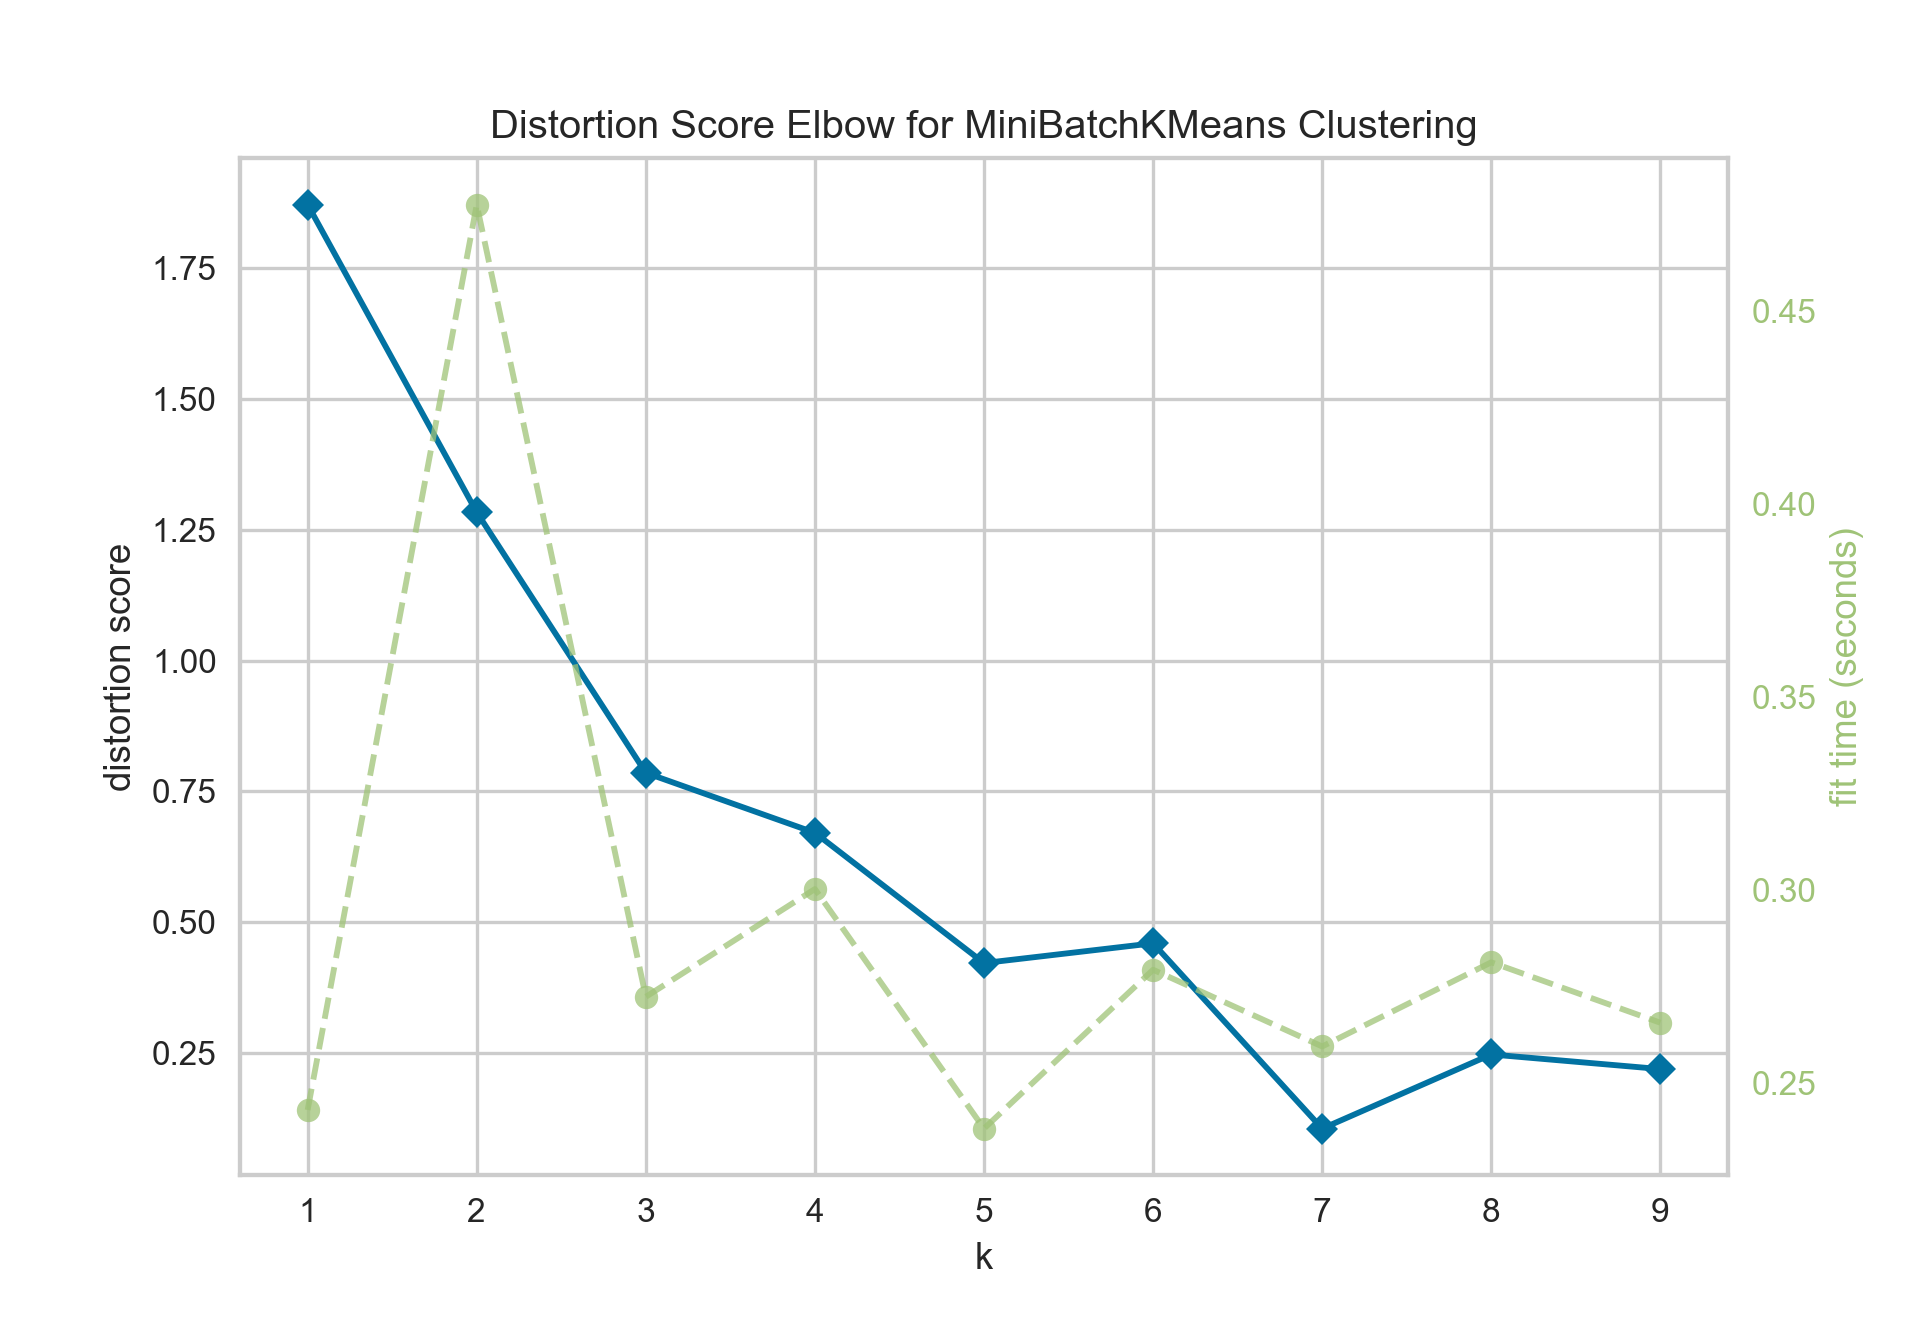

In [38]:
from sklearn.cluster import MiniBatchKMeans

from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(MiniBatchKMeans(), k=(1,10))

visualizer.fit(z_) 
visualizer.poof() 

It seems that the variable "ucr-rank" is composed of either 3 clusters.

### 8.2 OffenseGroup

In [39]:
y_ = y # remember that y is "offense group"
y_ = y_.reshape(-1, 1) # H

<IPython.core.display.Javascript object>


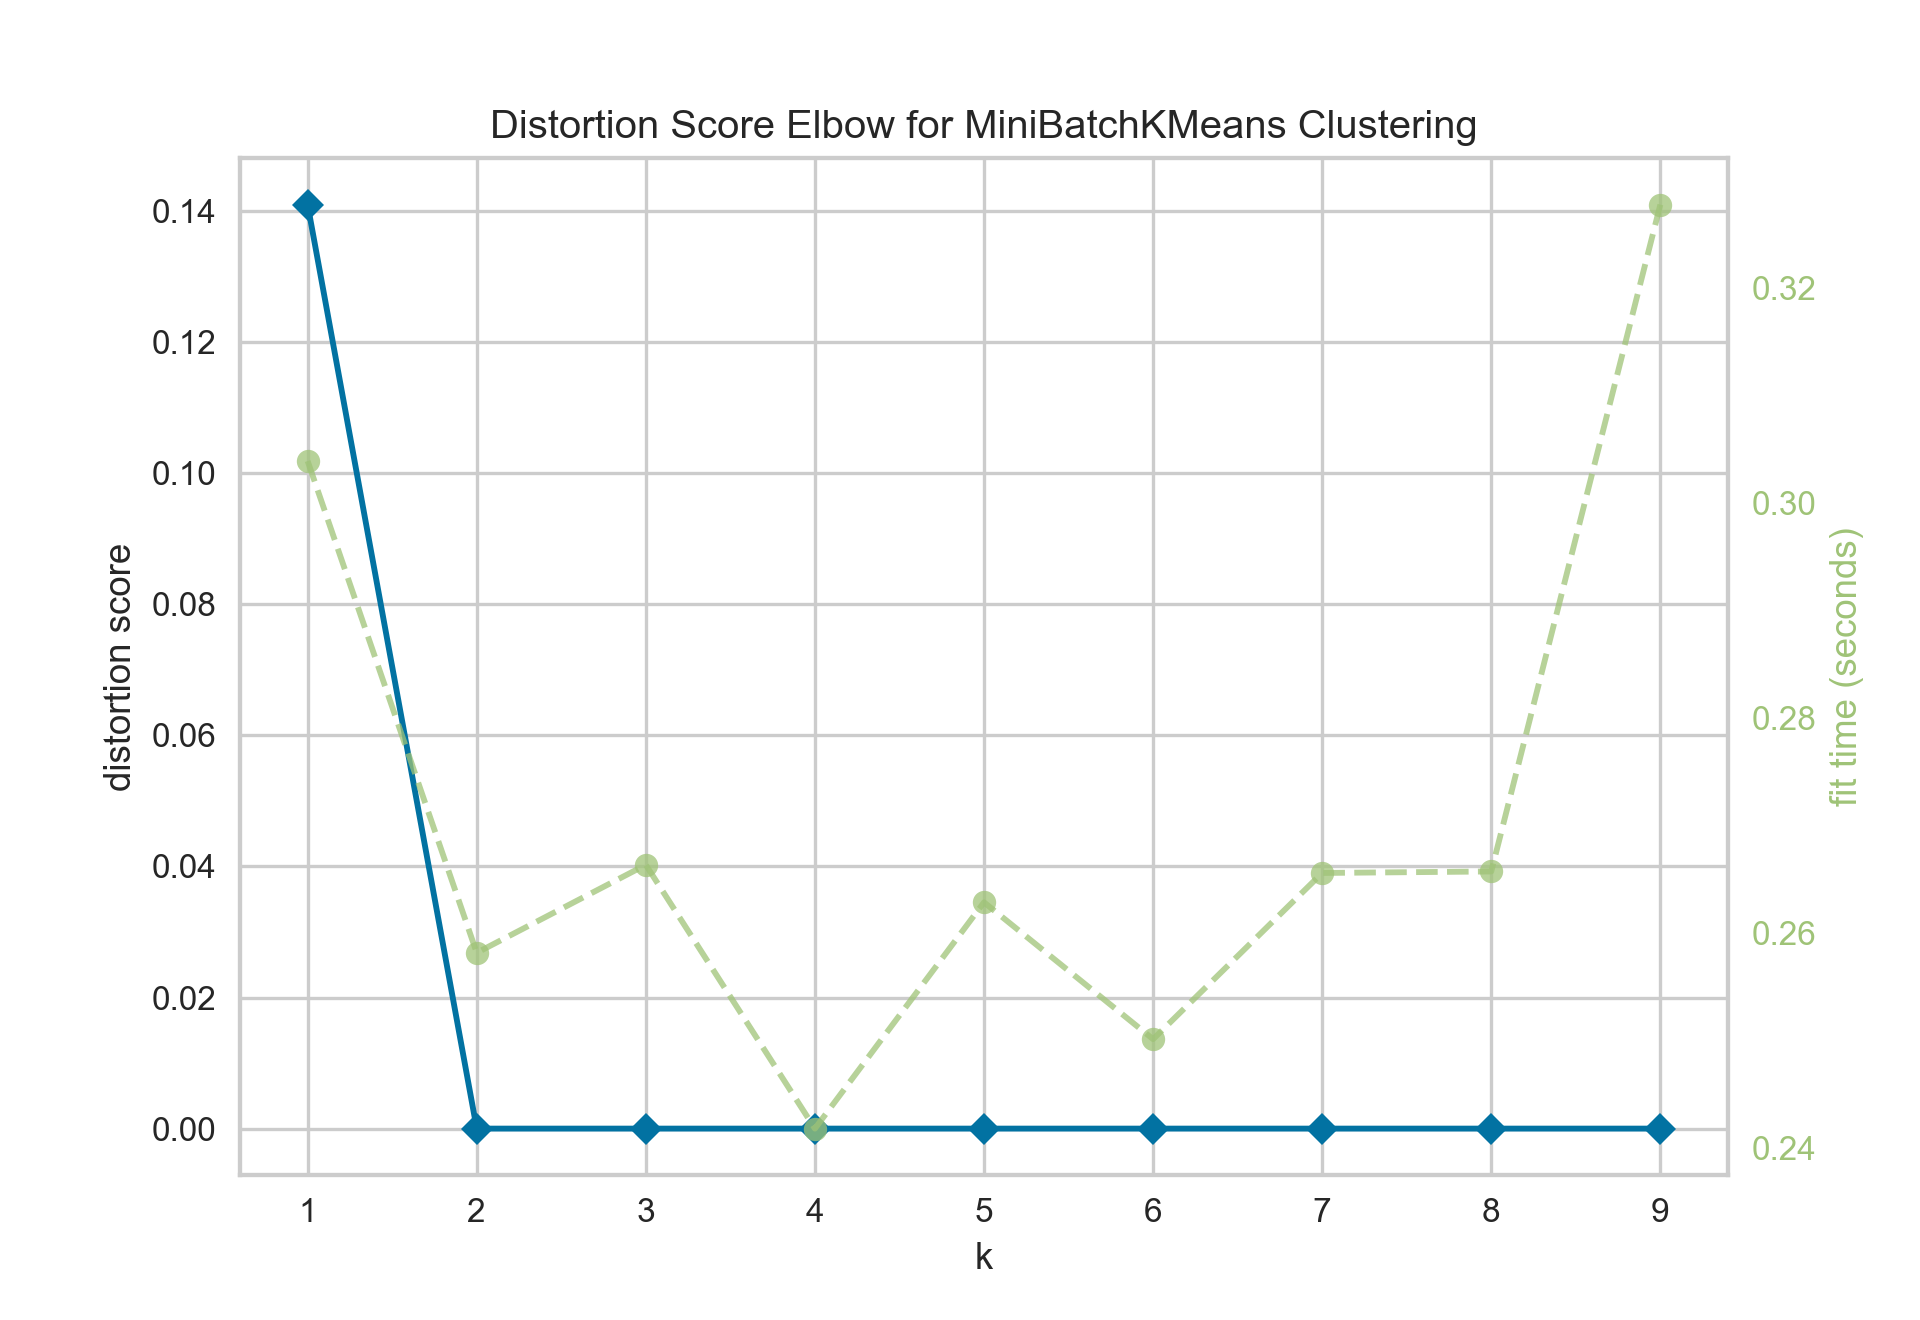

In [40]:
visualizer = KElbowVisualizer(MiniBatchKMeans(), k=(1,10))

visualizer.fit(y_) 
visualizer.poof() 

Here is perfectly clear that the variable "offensegroup" is composed of two clusters.